In [68]:
import os
import glob
import numpy as np
import pandas as pd
from scipy.io import wavfile

import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
wav_files = glob.glob("../data/sonitrol*/*.wav")
label_files = glob.glob("../data/sonitrol_audio_*/*.xlsx")
print len(wav_files)

2991


In [29]:
rate,sound = wavfile.read(wav_files[5])
print rate,len(sound)

22050 110250


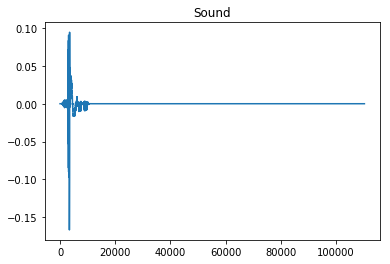

In [64]:
#Compute FFT and Power Spectrum
test_fft = np.fft.fft(sound)
pow_spec = np.abs(test_fft)**2

plt.title("Sound")
plt.plot(sound)
plt.show()

plt.title("FFT")
plt.plot(test_fft)
plt.show()

plt.title("Power Spectrum")
plt.plot(pow_spec[:int(len(pow_spec)/2.0)])
plt.show()

In [65]:
import resampy
sound2 = resampy.resample(sound, rate, 16000)
test2 = np.abs(np.fft.fft(sound2)[:int(len(sound2)/2.0)])
plt.title("Resampled FFT - Real Component")
plt.plot(test2)

640


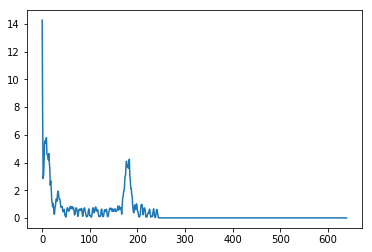

In [66]:
bins = 640
space = int(np.floor(len(test2)/640.0))
idxs = [x*space for x in range(bins)]
check = [np.mean(np.roll(test2,-x)[:space+1]) for x in idxs]
plt.plot(check)
print len(check)

In [71]:
def _get_label(name,frame):
    return int(np.unique(frame[frame['file_name']==name]['num_label']))

def stupid_process(files,df,bins=640,space=62):
    expected=40000
    data = {}
    labels = {}
    for rec in files:
        print rec
        name = rec.split("/")[-1]
        # Resample and FFT
        rate,sound = wavfile.read(rec)
        res = resampy.resample(sound, rate, 16000)
        real_fft = np.abs(np.fft.fft(res)[:int(len(res)/2.0)])
        
        #Get Label
        try:
            label = _get_label(name,df)
        except:
            print "SKIPPING - FOUND MULTIPLE LABELS FOR THIS ENTRY"
            continue
        # Downsample
        idxs = [x*space for x in range(bins)]
        downsample = [np.mean(np.roll(real_fft,-x)[:space+1]) for x in idxs]
        if len(real_fft)==expected:
            data[name]=downsample
            labels[name]=label
        else:
            print "SKIPPING - INCONSISTENT SIZE FOR FILE"+rec
    
    return data,labels

In [72]:
df = pd.concat((pd.read_excel(f) for f in label_files))
simple_vec,labs = stupid_process(wav_files,df)

../data/sonitrol_audio_01/Audio-1002_126-Dec_06_2017-22_56_51.wav
../data/sonitrol_audio_01/Audio-1002_96-Dec_02_2017-23_07_39.wav
../data/sonitrol_audio_01/Audio-1017_1-Dec_04_2017-20_45_58.wav
../data/sonitrol_audio_01/Audio-1017_32-Dec_03_2017-15_48_15.wav
../data/sonitrol_audio_01/Audio-1021_80-Dec_05_2017-20_03_18.wav
../data/sonitrol_audio_01/Audio-1021_80-Dec_07_2017-15_20_59.wav
../data/sonitrol_audio_01/Audio-1049_4-Dec_03_2017-10_24_07.wav
../data/sonitrol_audio_01/Audio-1060_4-Dec_04_2017-21_23_54.wav
../data/sonitrol_audio_01/Audio-1064_126-Dec_02_2017-05_38_06.wav
../data/sonitrol_audio_01/Audio-1071_29-Dec_06_2017-10_15_08.wav
../data/sonitrol_audio_01/Audio-1081_13-Dec_04_2017-08_42_16.wav
../data/sonitrol_audio_01/Audio-1089_27-Dec_02_2017-16_00_16.wav
../data/sonitrol_audio_01/Audio-1097_13-Dec_04_2017-23_22_52.wav
../data/sonitrol_audio_01/Audio-1103_32-Dec_02_2017-13_31_30.wav
../data/sonitrol_audio_01/Audio-1103_32-Dec_03_2017-16_48_05.wav
../data/sonitrol_audio_01/

../data/sonitrol_audio_01/Audio-1889_6-Nov_30_2017-20_49_21.wav
../data/sonitrol_audio_01/Audio-1889_6-Nov_30_2017-20_50_02.wav
../data/sonitrol_audio_01/Audio-1889_6-Nov_30_2017-20_50_34.wav
../data/sonitrol_audio_01/Audio-1889_6-Nov_30_2017-21_25_18.wav
../data/sonitrol_audio_01/Audio-1889_6-Nov_30_2017-21_34_02.wav
../data/sonitrol_audio_01/Audio-1894_26-Dec_03_2017-01_59_11.wav
../data/sonitrol_audio_01/Audio-1903_125-Dec_05_2017-01_14_13.wav
../data/sonitrol_audio_01/Audio-1903_125-Dec_06_2017-00_51_22.wav
../data/sonitrol_audio_01/Audio-1915_127-Dec_06_2017-21_54_38.wav
../data/sonitrol_audio_01/Audio-1915_127-Dec_06_2017-22_03_26.wav
../data/sonitrol_audio_01/Audio-1915_127-Dec_06_2017-22_07_22.wav
../data/sonitrol_audio_01/Audio-1943_117-Dec_07_2017-04_06_57.wav
../data/sonitrol_audio_01/Audio-1945_103-Dec_04_2017-10_10_35.wav
../data/sonitrol_audio_01/Audio-1945_103-Dec_04_2017-10_30_37.wav
../data/sonitrol_audio_01/Audio-1972_1-Dec_01_2017-02_40_27.wav
../data/sonitrol_audio_

../data/sonitrol_audio_01/Audio-2415_91-Dec_02_2017-15_32_26.wav
../data/sonitrol_audio_01/Audio-2417_127-Dec_03_2017-23_01_27.wav
../data/sonitrol_audio_01/Audio-2435_6-Dec_05_2017-13_13_14.wav
../data/sonitrol_audio_01/Audio-2440_143-Dec_06_2017-17_33_35.wav
../data/sonitrol_audio_01/Audio-2446_122-Dec_03_2017-23_25_56.wav
../data/sonitrol_audio_01/Audio-2457_6-Dec_04_2017-04_46_22.wav
../data/sonitrol_audio_01/Audio-2463_120-Dec_02_2017-06_29_11.wav
../data/sonitrol_audio_01/Audio-2471_6-Dec_01_2017-16_09_30.wav
../data/sonitrol_audio_01/Audio-2473_6-Dec_04_2017-20_45_22.wav
../data/sonitrol_audio_01/Audio-2473_6-Dec_05_2017-12_18_02.wav
../data/sonitrol_audio_01/Audio-2473_6-Dec_06_2017-15_31_01.wav
../data/sonitrol_audio_01/Audio-2489_4-Dec_03_2017-07_57_50.wav
../data/sonitrol_audio_01/Audio-2497_6-Dec_05_2017-13_17_45.wav
../data/sonitrol_audio_01/Audio-2500_122-Dec_07_2017-17_13_37.wav
../data/sonitrol_audio_01/Audio-2501_96-Dec_02_2017-13_39_03.wav
../data/sonitrol_audio_01/Au

../data/sonitrol_audio_01/Audio-3155_85-Dec_02_2017-00_51_14.wav
../data/sonitrol_audio_01/Audio-3166_92-Dec_03_2017-05_13_48.wav
../data/sonitrol_audio_01/Audio-3180_119-Dec_02_2017-18_14_02.wav
../data/sonitrol_audio_01/Audio-3194_85-Dec_01_2017-16_52_57.wav
../data/sonitrol_audio_01/Audio-3205_85-Dec_05_2017-19_29_38.wav
../data/sonitrol_audio_01/Audio-3261_85-Dec_04_2017-17_43_30.wav
../data/sonitrol_audio_01/Audio-3261_85-Dec_05_2017-05_41_26.wav
../data/sonitrol_audio_01/Audio-3261_85-Dec_06_2017-21_25_21.wav
../data/sonitrol_audio_01/Audio-3261_85-Dec_07_2017-15_15_01.wav
../data/sonitrol_audio_01/Audio-3269_122-Dec_03_2017-04_02_21.wav
../data/sonitrol_audio_01/Audio-3276_80-Dec_07_2017-10_43_22.wav
../data/sonitrol_audio_01/Audio-3276_80-Dec_07_2017-10_44_33.wav
../data/sonitrol_audio_01/Audio-328_8-Dec_07_2017-00_03_30.wav
../data/sonitrol_audio_01/Audio-3291_15-Dec_05_2017-23_48_01.wav
../data/sonitrol_audio_01/Audio-3293_7-Dec_05_2017-19_18_26.wav
../data/sonitrol_audio_01/

../data/sonitrol_audio_01/Audio-4112_80-Dec_02_2017-17_03_03.wav
../data/sonitrol_audio_01/Audio-4112_80-Nov_30_2017-23_46_22.wav
../data/sonitrol_audio_01/Audio-4120_126-Dec_02_2017-09_16_38.wav
../data/sonitrol_audio_01/Audio-4120_126-Dec_04_2017-17_03_29.wav
../data/sonitrol_audio_01/Audio-4120_126-Dec_05_2017-19_05_09.wav
../data/sonitrol_audio_01/Audio-4121_127-Dec_04_2017-20_57_30.wav
../data/sonitrol_audio_01/Audio-4126_97-Dec_07_2017-17_57_43.wav
../data/sonitrol_audio_01/Audio-4132_122-Dec_06_2017-17_33_30.wav
../data/sonitrol_audio_01/Audio-4142_22-Dec_06_2017-10_49_43.wav
../data/sonitrol_audio_01/Audio-4142_246-Dec_02_2017-20_16_27.wav
../data/sonitrol_audio_01/Audio-4149_1-Dec_07_2017-16_59_43.wav
../data/sonitrol_audio_01/Audio-4169_7-Dec_05_2017-22_53_57.wav
../data/sonitrol_audio_01/Audio-4178_13-Dec_05_2017-16_48_45.wav
../data/sonitrol_audio_01/Audio-4178_13-Dec_06_2017-16_45_19.wav
../data/sonitrol_audio_01/Audio-4197_85-Dec_02_2017-05_56_58.wav
../data/sonitrol_audi

../data/sonitrol_audio_01/Audio-4989_32-Dec_04_2017-05_52_42.wav
../data/sonitrol_audio_01/Audio-5003_25-Dec_04_2017-18_42_15.wav
../data/sonitrol_audio_01/Audio-5031_25-Dec_04_2017-19_05_55.wav
../data/sonitrol_audio_01/Audio-5031_25-Dec_05_2017-19_40_29.wav
../data/sonitrol_audio_01/Audio-5031_25-Dec_05_2017-19_41_31.wav
../data/sonitrol_audio_01/Audio-5031_25-Dec_05_2017-19_43_50.wav
../data/sonitrol_audio_01/Audio-5036_105-Dec_04_2017-18_36_23.wav
../data/sonitrol_audio_01/Audio-5036_105-Dec_05_2017-20_11_08.wav
../data/sonitrol_audio_01/Audio-5036_105-Dec_05_2017-21_02_14.wav
../data/sonitrol_audio_01/Audio-5036_105-Dec_06_2017-17_30_22.wav
../data/sonitrol_audio_01/Audio-5066_16-Dec_01_2017-08_04_52.wav
../data/sonitrol_audio_01/Audio-5073_96-Dec_04_2017-20_34_11.wav
../data/sonitrol_audio_01/Audio-5108_96-Dec_01_2017-06_39_36.wav
../data/sonitrol_audio_01/Audio-5121_122-Dec_01_2017-15_54_11.wav
../data/sonitrol_audio_01/Audio-5146_32-Dec_02_2017-17_22_34.wav
../data/sonitrol_aud

../data/sonitrol_audio_01/Audio-6461_20-Dec_03_2017-16_22_35.wav
../data/sonitrol_audio_01/Audio-6463_20-Dec_05_2017-18_42_49.wav
../data/sonitrol_audio_01/Audio-6475_80-Dec_07_2017-00_35_42.wav
../data/sonitrol_audio_01/Audio-6476_96-Dec_01_2017-23_48_41.wav
../data/sonitrol_audio_01/Audio-6476_96-Dec_02_2017-03_59_38.wav
../data/sonitrol_audio_01/Audio-6499_5-Dec_05_2017-16_57_36.wav
../data/sonitrol_audio_01/Audio-6513_11-Dec_02_2017-09_54_52.wav
../data/sonitrol_audio_01/Audio-6538_96-Dec_03_2017-03_24_41.wav
../data/sonitrol_audio_01/Audio-6538_96-Dec_05_2017-22_32_37.wav
../data/sonitrol_audio_01/Audio-654_108-Dec_01_2017-15_26_06.wav
../data/sonitrol_audio_01/Audio-6551_127-Dec_06_2017-21_16_11.wav
../data/sonitrol_audio_01/Audio-6553_17-Dec_06_2017-18_58_05.wav
../data/sonitrol_audio_01/Audio-6557_5-Dec_03_2017-11_38_34.wav
../data/sonitrol_audio_01/Audio-6565_126-Dec_02_2017-23_09_53.wav
../data/sonitrol_audio_01/Audio-6565_126-Dec_03_2017-00_14_19.wav
../data/sonitrol_audio_0

../data/sonitrol_audio_01/Audio-7705_104-Dec_06_2017-22_24_07.wav
../data/sonitrol_audio_01/Audio-7705_33-Dec_01_2017-21_48_43.wav
../data/sonitrol_audio_01/Audio-7706_104-Dec_05_2017-21_06_30.wav
../data/sonitrol_audio_01/Audio-7711_126-Dec_01_2017-14_19_16.wav
../data/sonitrol_audio_01/Audio-7718_105-Dec_02_2017-16_33_30.wav
../data/sonitrol_audio_01/Audio-7725_96-Dec_02_2017-09_07_16.wav
../data/sonitrol_audio_01/Audio-7733_104-Dec_05_2017-21_53_00.wav
../data/sonitrol_audio_01/Audio-7733_104-Dec_05_2017-22_30_39.wav
../data/sonitrol_audio_01/Audio-7742_98-Dec_02_2017-13_31_06.wav
../data/sonitrol_audio_01/Audio-7746_20-Dec_03_2017-00_53_05.wav
../data/sonitrol_audio_01/Audio-7797_21-Dec_02_2017-11_35_12.wav
../data/sonitrol_audio_01/Audio-7808_125-Dec_02_2017-10_23_33.wav
../data/sonitrol_audio_01/Audio-7808_33-Dec_02_2017-18_56_09.wav
../data/sonitrol_audio_01/Audio-7814_96-Dec_04_2017-05_44_24.wav
../data/sonitrol_audio_01/Audio-7821_26-Dec_05_2017-00_19_42.wav
../data/sonitrol_a

../data/sonitrol_audio_02/Audio-1002_126-Dec_10_2017-03_00_40.wav
../data/sonitrol_audio_02/Audio-1004_80-Dec_13_2017-16_17_35.wav
../data/sonitrol_audio_02/Audio-1006_33-Dec_09_2017-11_03_08.wav
../data/sonitrol_audio_02/Audio-1017_1-Dec_10_2017-04_57_18.wav
../data/sonitrol_audio_02/Audio-1021_80-Dec_11_2017-16_31_00.wav
../data/sonitrol_audio_02/Audio-1029_17-Dec_09_2017-13_01_51.wav
../data/sonitrol_audio_02/Audio-1036_8-Dec_10_2017-08_38_06.wav
../data/sonitrol_audio_02/Audio-104_20-Dec_09_2017-22_22_47.wav
../data/sonitrol_audio_02/Audio-1058_126-Dec_12_2017-07_10_21.wav
../data/sonitrol_audio_02/Audio-1067_32-Dec_09_2017-07_57_26.wav
../data/sonitrol_audio_02/Audio-1069_24-Dec_09_2017-15_59_28.wav
../data/sonitrol_audio_02/Audio-1094_125-Dec_10_2017-16_39_46.wav
../data/sonitrol_audio_02/Audio-1147_143-Dec_12_2017-23_14_31.wav
../data/sonitrol_audio_02/Audio-1191_244-Dec_09_2017-10_17_03.wav
../data/sonitrol_audio_02/Audio-1196_20-Dec_14_2017-04_11_28.wav
../data/sonitrol_audio_

../data/sonitrol_audio_02/Audio-1894_26-Dec_09_2017-03_43_06.wav
../data/sonitrol_audio_02/Audio-1894_26-Dec_12_2017-02_41_09.wav
../data/sonitrol_audio_02/Audio-1896_6-Dec_12_2017-23_33_19.wav
../data/sonitrol_audio_02/Audio-1903_125-Dec_12_2017-17_22_07.wav
../data/sonitrol_audio_02/Audio-1907_80-Dec_08_2017-19_41_07.wav
../data/sonitrol_audio_02/Audio-1937_104-Dec_11_2017-02_05_30.wav
../data/sonitrol_audio_02/Audio-1943_117-Dec_13_2017-16_41_49.wav
../data/sonitrol_audio_02/Audio-1967_118-Dec_09_2017-02_08_05.wav
../data/sonitrol_audio_02/Audio-1969_80-Dec_12_2017-21_34_42.wav
../data/sonitrol_audio_02/Audio-1969_80-Dec_13_2017-22_42_03.wav
../data/sonitrol_audio_02/Audio-1969_80-Dec_13_2017-23_03_07.wav
../data/sonitrol_audio_02/Audio-1969_80-Dec_13_2017-23_24_03.wav
../data/sonitrol_audio_02/Audio-1969_80-Dec_14_2017-00_24_33.wav
../data/sonitrol_audio_02/Audio-1969_80-Dec_14_2017-01_28_03.wav
../data/sonitrol_audio_02/Audio-1969_80-Dec_14_2017-04_57_33.wav
../data/sonitrol_audio

../data/sonitrol_audio_02/Audio-2473_6-Dec_10_2017-17_49_48.wav
../data/sonitrol_audio_02/Audio-2476_6-Dec_13_2017-05_50_44.wav
../data/sonitrol_audio_02/Audio-2489_32-Dec_10_2017-15_28_08.wav
../data/sonitrol_audio_02/Audio-2501_96-Dec_11_2017-18_22_30.wav
../data/sonitrol_audio_02/Audio-2501_96-Dec_11_2017-18_26_38.wav
../data/sonitrol_audio_02/Audio-2501_96-Dec_11_2017-18_32_37.wav
SKIPPING - FOUND MULTIPLE LABELS FOR THIS ENTRY
../data/sonitrol_audio_02/Audio-2504_20-Dec_07_2017-21_15_24.wav
../data/sonitrol_audio_02/Audio-2530_143-Dec_13_2017-19_38_24.wav
../data/sonitrol_audio_02/Audio-2534_2-Dec_07_2017-20_16_57.wav
../data/sonitrol_audio_02/Audio-2543_1-Dec_14_2017-13_05_54.wav
../data/sonitrol_audio_02/Audio-2581_23-Dec_10_2017-21_55_30.wav
../data/sonitrol_audio_02/Audio-2581_23-Dec_13_2017-22_18_34.wav
../data/sonitrol_audio_02/Audio-2581_23-Dec_14_2017-00_10_36.wav
../data/sonitrol_audio_02/Audio-2605_20-Dec_08_2017-23_16_12.wav
../data/sonitrol_audio_02/Audio-2612_117-Dec_

../data/sonitrol_audio_02/Audio-3507_97-Dec_08_2017-23_18_01.wav
../data/sonitrol_audio_02/Audio-3507_97-Dec_08_2017-23_19_38.wav
../data/sonitrol_audio_02/Audio-3516_2-Dec_07_2017-21_32_15.wav
../data/sonitrol_audio_02/Audio-3536_105-Dec_13_2017-03_33_06.wav
../data/sonitrol_audio_02/Audio-3539_118-Dec_13_2017-18_17_03.wav
../data/sonitrol_audio_02/Audio-3548_14-Dec_13_2017-04_00_22.wav
../data/sonitrol_audio_02/Audio-3551_15-Dec_10_2017-23_33_20.wav
../data/sonitrol_audio_02/Audio-3556_23-Dec_07_2017-21_04_17.wav
../data/sonitrol_audio_02/Audio-3571_112-Dec_11_2017-01_49_43.wav
../data/sonitrol_audio_02/Audio-3602_18-Dec_10_2017-22_41_26.wav
../data/sonitrol_audio_02/Audio-3602_18-Dec_11_2017-16_50_42.wav
../data/sonitrol_audio_02/Audio-3613_85-Dec_08_2017-20_49_12.wav
../data/sonitrol_audio_02/Audio-3613_85-Dec_11_2017-00_21_28.wav
../data/sonitrol_audio_02/Audio-3623_85-Dec_08_2017-20_56_38.wav
../data/sonitrol_audio_02/Audio-3623_85-Dec_09_2017-00_21_06.wav
../data/sonitrol_audio_

../data/sonitrol_audio_02/Audio-4229_2-Dec_08_2017-00_01_22.wav
SKIPPING - INCONSISTENT SIZE FOR FILE../data/sonitrol_audio_02/Audio-4229_2-Dec_08_2017-00_01_22.wav
../data/sonitrol_audio_02/Audio-4233_7-Dec_09_2017-14_37_19.wav
../data/sonitrol_audio_02/Audio-4236_91-Dec_13_2017-19_25_23.wav
../data/sonitrol_audio_02/Audio-4237_80-Dec_10_2017-18_50_06.wav
../data/sonitrol_audio_02/Audio-4237_80-Dec_10_2017-21_22_51.wav
../data/sonitrol_audio_02/Audio-4237_80-Dec_10_2017-22_14_47.wav
../data/sonitrol_audio_02/Audio-4237_80-Dec_13_2017-18_53_34.wav
../data/sonitrol_audio_02/Audio-4237_80-Dec_14_2017-06_53_20.wav
../data/sonitrol_audio_02/Audio-4253_97-Dec_11_2017-16_59_19.wav
../data/sonitrol_audio_02/Audio-4271_85-Dec_09_2017-05_49_18.wav
../data/sonitrol_audio_02/Audio-4278_80-Dec_11_2017-18_10_29.wav
../data/sonitrol_audio_02/Audio-4278_80-Dec_13_2017-21_07_42.wav
../data/sonitrol_audio_02/Audio-4282_18-Dec_10_2017-17_10_09.wav
../data/sonitrol_audio_02/Audio-4294_3-Dec_12_2017-21_07

../data/sonitrol_audio_02/Audio-4981_96-Dec_11_2017-19_26_44.wav
../data/sonitrol_audio_02/Audio-4999_13-Dec_09_2017-23_42_38.wav
../data/sonitrol_audio_02/Audio-5005_122-Dec_08_2017-21_53_23.wav
../data/sonitrol_audio_02/Audio-5009_20-Dec_10_2017-15_41_40.wav
../data/sonitrol_audio_02/Audio-5012_122-Dec_12_2017-15_48_49.wav
../data/sonitrol_audio_02/Audio-5020_100-Dec_10_2017-11_33_51.wav
../data/sonitrol_audio_02/Audio-5028_96-Dec_07_2017-18_22_43.wav
../data/sonitrol_audio_02/Audio-5031_25-Dec_09_2017-19_15_41.wav
../data/sonitrol_audio_02/Audio-5031_25-Dec_12_2017-19_00_30.wav
../data/sonitrol_audio_02/Audio-5032_244-Dec_12_2017-20_58_21.wav
../data/sonitrol_audio_02/Audio-5048_1-Dec_12_2017-01_25_21.wav
../data/sonitrol_audio_02/Audio-5053_100-Dec_14_2017-09_50_22.wav
../data/sonitrol_audio_02/Audio-5089_32-Dec_10_2017-22_32_34.wav
../data/sonitrol_audio_02/Audio-510082_23-Dec_09_2017-06_19_24.wav
../data/sonitrol_audio_02/Audio-510082_23-Dec_09_2017-10_43_36.wav
../data/sonitrol_

../data/sonitrol_audio_02/Audio-6405_112-Dec_10_2017-17_50_34.wav
../data/sonitrol_audio_02/Audio-6405_112-Dec_10_2017-17_53_11.wav
../data/sonitrol_audio_02/Audio-6405_112-Dec_13_2017-18_46_53.wav
../data/sonitrol_audio_02/Audio-6442_127-Dec_13_2017-18_46_13.wav
../data/sonitrol_audio_02/Audio-6463_20-Dec_08_2017-21_22_43.wav
../data/sonitrol_audio_02/Audio-6463_80-Dec_13_2017-16_02_07.wav
../data/sonitrol_audio_02/Audio-6463_80-Dec_13_2017-16_23_38.wav
../data/sonitrol_audio_02/Audio-6477_244-Dec_13_2017-00_56_58.wav
../data/sonitrol_audio_02/Audio-6477_244-Dec_13_2017-01_00_36.wav
../data/sonitrol_audio_02/Audio-6482_96-Dec_10_2017-17_45_33.wav
../data/sonitrol_audio_02/Audio-6507_96-Dec_10_2017-23_39_15.wav
../data/sonitrol_audio_02/Audio-6513_11-Dec_10_2017-14_51_25.wav
../data/sonitrol_audio_02/Audio-6523_120-Dec_14_2017-15_54_12.wav
../data/sonitrol_audio_02/Audio-6534_120-Dec_07_2017-20_54_57.wav
../data/sonitrol_audio_02/Audio-6536_5-Dec_08_2017-16_31_11.wav
../data/sonitrol_a

../data/sonitrol_audio_02/Audio-7681_5-Dec_10_2017-18_55_36.wav
../data/sonitrol_audio_02/Audio-7681_5-Dec_10_2017-19_52_05.wav
../data/sonitrol_audio_02/Audio-7681_5-Dec_10_2017-19_57_26.wav
../data/sonitrol_audio_02/Audio-7681_5-Dec_10_2017-19_59_34.wav
../data/sonitrol_audio_02/Audio-7682_8-Dec_10_2017-09_22_16.wav
../data/sonitrol_audio_02/Audio-7694_85-Dec_10_2017-19_55_41.wav
../data/sonitrol_audio_02/Audio-7694_85-Dec_11_2017-03_40_51.wav
../data/sonitrol_audio_02/Audio-7696_96-Dec_09_2017-22_56_20.wav
../data/sonitrol_audio_02/Audio-7701_105-Dec_10_2017-16_04_24.wav
../data/sonitrol_audio_02/Audio-7705_33-Dec_10_2017-02_13_23.wav
../data/sonitrol_audio_02/Audio-7705_33-Dec_10_2017-19_35_03.wav
../data/sonitrol_audio_02/Audio-7705_33-Dec_13_2017-04_26_29.wav
../data/sonitrol_audio_02/Audio-7706_14-Dec_11_2017-21_21_17.wav
../data/sonitrol_audio_02/Audio-7723_22-Dec_13_2017-06_47_36.wav
../data/sonitrol_audio_02/Audio-7725_96-Dec_12_2017-23_18_17.wav
../data/sonitrol_audio_02/Aud

../data/sonitrol_audio_02/Audio-8920_20-Dec_11_2017-22_50_16.wav
../data/sonitrol_audio_02/Audio-8925_104-Dec_09_2017-17_18_18.wav
../data/sonitrol_audio_02/Audio-8933_112-Dec_10_2017-22_46_16.wav
../data/sonitrol_audio_02/Audio-8958_124-Dec_13_2017-18_07_29.wav
../data/sonitrol_audio_02/Audio-8958_124-Dec_13_2017-19_42_58.wav
../data/sonitrol_audio_02/Audio-8965_126-Dec_10_2017-09_04_33.wav
../data/sonitrol_audio_02/Audio-8967_33-Dec_11_2017-23_24_05.wav
../data/sonitrol_audio_02/Audio-8967_33-Dec_13_2017-19_10_27.wav
../data/sonitrol_audio_02/Audio-8998_126-Dec_10_2017-22_37_52.wav
../data/sonitrol_audio_02/Audio-910_21-Dec_13_2017-02_03_39.wav
../data/sonitrol_audio_02/Audio-9195_104-Dec_09_2017-23_47_20.wav
../data/sonitrol_audio_02/Audio-9195_104-Dec_10_2017-12_57_55.wav
../data/sonitrol_audio_02/Audio-924_21-Dec_13_2017-01_55_15.wav
../data/sonitrol_audio_02/Audio-9314_126-Dec_11_2017-16_37_43.wav
../data/sonitrol_audio_02/Audio-9425_126-Dec_11_2017-16_56_50.wav
../data/sonitrol_

../data/sonitrol_audio_03/Audio-1719_122-Dec_18_2017-17_51_55.wav
../data/sonitrol_audio_03/Audio-1719_96-Dec_18_2017-23_17_32.wav
../data/sonitrol_audio_03/Audio-1719_96-Dec_20_2017-02_13_38.wav
../data/sonitrol_audio_03/Audio-1722_125-Dec_21_2017-04_02_22.wav
../data/sonitrol_audio_03/Audio-1728_126-Dec_16_2017-18_21_37.wav
../data/sonitrol_audio_03/Audio-1729_32-Dec_16_2017-16_56_22.wav
../data/sonitrol_audio_03/Audio-1755_80-Dec_16_2017-22_57_27.wav
../data/sonitrol_audio_03/Audio-1755_80-Dec_18_2017-23_51_50.wav
../data/sonitrol_audio_03/Audio-1758_3-Dec_19_2017-21_52_16.wav
../data/sonitrol_audio_03/Audio-1762_3-Dec_16_2017-23_07_10.wav
../data/sonitrol_audio_03/Audio-1770_80-Dec_14_2017-18_44_42.wav
../data/sonitrol_audio_03/Audio-1770_80-Dec_15_2017-17_59_39.wav
../data/sonitrol_audio_03/Audio-1778_3-Dec_17_2017-02_15_37.wav
../data/sonitrol_audio_03/Audio-1779_3-Dec_19_2017-21_29_11.wav
../data/sonitrol_audio_03/Audio-1783_80-Dec_18_2017-16_35_37.wav
../data/sonitrol_audio_03/

../data/sonitrol_audio_03/Audio-2269_6-Dec_17_2017-00_35_10.wav
../data/sonitrol_audio_03/Audio-2278_96-Dec_16_2017-22_04_53.wav
../data/sonitrol_audio_03/Audio-2278_96-Dec_17_2017-02_50_29.wav
../data/sonitrol_audio_03/Audio-2278_96-Dec_18_2017-21_57_22.wav
../data/sonitrol_audio_03/Audio-2281_21-Dec_19_2017-05_32_28.wav
../data/sonitrol_audio_03/Audio-2296_80-Dec_18_2017-05_11_53.wav
../data/sonitrol_audio_03/Audio-2300_104-Dec_15_2017-03_03_32.wav
../data/sonitrol_audio_03/Audio-2300_80-Dec_18_2017-14_25_05.wav
../data/sonitrol_audio_03/Audio-2304_6-Dec_20_2017-02_58_01.wav
../data/sonitrol_audio_03/Audio-2305_125-Dec_16_2017-22_46_28.wav
../data/sonitrol_audio_03/Audio-2305_125-Dec_17_2017-23_33_42.wav
../data/sonitrol_audio_03/Audio-2315_80-Dec_17_2017-23_11_59.wav
../data/sonitrol_audio_03/Audio-2315_80-Dec_18_2017-01_33_07.wav
../data/sonitrol_audio_03/Audio-2327_61-Dec_17_2017-03_57_10.wav
../data/sonitrol_audio_03/Audio-2327_61-Dec_19_2017-05_27_04.wav
../data/sonitrol_audio_0

../data/sonitrol_audio_03/Audio-3141_80-Dec_17_2017-21_35_57.wav
../data/sonitrol_audio_03/Audio-3141_80-Dec_18_2017-20_41_03.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_16_2017-00_31_03.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_16_2017-18_16_43.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_16_2017-21_33_26.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_17_2017-06_36_14.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_17_2017-09_25_00.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_17_2017-17_57_51.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_17_2017-22_46_09.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_18_2017-18_32_47.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_18_2017-19_23_36.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_18_2017-21_02_55.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_18_2017-23_11_47.wav
../data/sonitrol_audio_03/Audio-3142_80-Dec_18_2017-23_36_02.wav
../data/sonitrol_audio_03/Audio-3156_14-Dec_19_2017-18_24_47.wav
SKIPPING - INCONSISTENT S

../data/sonitrol_audio_03/Audio-4094_85-Dec_19_2017-16_07_23.wav
../data/sonitrol_audio_03/Audio-4106_80-Dec_16_2017-22_57_49.wav
../data/sonitrol_audio_03/Audio-4106_80-Dec_18_2017-04_15_24.wav
../data/sonitrol_audio_03/Audio-4112_80-Dec_15_2017-20_03_05.wav
../data/sonitrol_audio_03/Audio-4112_80-Dec_19_2017-19_03_02.wav
../data/sonitrol_audio_03/Audio-4114_80-Dec_18_2017-18_48_57.wav
../data/sonitrol_audio_03/Audio-4114_80-Dec_19_2017-05_33_29.wav
../data/sonitrol_audio_03/Audio-4120_126-Dec_16_2017-19_09_21.wav
../data/sonitrol_audio_03/Audio-4120_126-Dec_17_2017-12_46_49.wav
../data/sonitrol_audio_03/Audio-4120_126-Dec_17_2017-18_22_58.wav
../data/sonitrol_audio_03/Audio-4120_126-Dec_17_2017-19_00_25.wav
../data/sonitrol_audio_03/Audio-4120_126-Dec_21_2017-07_47_24.wav
../data/sonitrol_audio_03/Audio-4127_20-Dec_20_2017-07_50_29.wav
../data/sonitrol_audio_03/Audio-4127_80-Dec_19_2017-19_00_26.wav
../data/sonitrol_audio_03/Audio-4138_80-Dec_15_2017-23_17_35.wav
../data/sonitrol_aud

../data/sonitrol_audio_03/Audio-4840_11-Dec_16_2017-12_34_53.wav
../data/sonitrol_audio_03/Audio-4857_125-Dec_16_2017-23_08_40.wav
../data/sonitrol_audio_03/Audio-4873_3-Dec_15_2017-01_41_28.wav
../data/sonitrol_audio_03/Audio-4873_3-Dec_15_2017-01_58_39.wav
../data/sonitrol_audio_03/Audio-4942_16-Dec_17_2017-14_07_50.wav
../data/sonitrol_audio_03/Audio-4942_16-Dec_19_2017-15_53_21.wav
../data/sonitrol_audio_03/Audio-4961_1-Dec_18_2017-17_39_53.wav
../data/sonitrol_audio_03/Audio-4974_3-Dec_18_2017-19_11_04.wav
../data/sonitrol_audio_03/Audio-4981_96-Dec_18_2017-02_54_49.wav
../data/sonitrol_audio_03/Audio-4988_5-Dec_16_2017-12_22_06.wav
../data/sonitrol_audio_03/Audio-5005_25-Dec_20_2017-08_26_18.wav
../data/sonitrol_audio_03/Audio-5005_3-Dec_19_2017-18_29_59.wav
../data/sonitrol_audio_03/Audio-5012_3-Dec_17_2017-15_32_11.wav
../data/sonitrol_audio_03/Audio-5016_105-Dec_14_2017-22_07_42.wav
../data/sonitrol_audio_03/Audio-5018_15-Dec_18_2017-21_32_51.wav
../data/sonitrol_audio_03/Audi

../data/sonitrol_audio_03/Audio-6408_17-Dec_15_2017-22_51_57.wav
../data/sonitrol_audio_03/Audio-6408_17-Dec_17_2017-02_04_29.wav
../data/sonitrol_audio_03/Audio-6408_17-Dec_19_2017-05_55_45.wav
../data/sonitrol_audio_03/Audio-6424_32-Dec_16_2017-08_51_31.wav
../data/sonitrol_audio_03/Audio-6424_32-Dec_16_2017-23_12_34.wav
../data/sonitrol_audio_03/Audio-6424_32-Dec_17_2017-02_58_11.wav
../data/sonitrol_audio_03/Audio-6424_32-Dec_17_2017-13_36_04.wav
../data/sonitrol_audio_03/Audio-6424_32-Dec_17_2017-16_47_08.wav
../data/sonitrol_audio_03/Audio-6431_96-Dec_17_2017-08_16_45.wav
../data/sonitrol_audio_03/Audio-6431_96-Dec_17_2017-08_18_36.wav
../data/sonitrol_audio_03/Audio-6460_17-Dec_16_2017-21_30_03.wav
../data/sonitrol_audio_03/Audio-6461_20-Dec_14_2017-20_57_31.wav
../data/sonitrol_audio_03/Audio-6461_20-Dec_17_2017-23_45_54.wav
../data/sonitrol_audio_03/Audio-6470_96-Dec_20_2017-01_42_32.wav
../data/sonitrol_audio_03/Audio-6480_7-Dec_18_2017-21_48_24.wav
../data/sonitrol_audio_03/

../data/sonitrol_audio_03/Audio-7481_21-Dec_17_2017-15_01_14.wav
../data/sonitrol_audio_03/Audio-7481_21-Dec_17_2017-15_02_25.wav
../data/sonitrol_audio_03/Audio-7481_21-Dec_17_2017-15_47_00.wav
../data/sonitrol_audio_03/Audio-7518_65-Dec_19_2017-09_05_23.wav
../data/sonitrol_audio_03/Audio-7531_105-Dec_16_2017-09_21_33.wav
../data/sonitrol_audio_03/Audio-7531_105-Dec_17_2017-03_53_29.wav
../data/sonitrol_audio_03/Audio-7555_96-Dec_17_2017-07_22_57.wav
../data/sonitrol_audio_03/Audio-7557_105-Dec_17_2017-05_18_18.wav
../data/sonitrol_audio_03/Audio-7557_105-Dec_20_2017-02_57_25.wav
../data/sonitrol_audio_03/Audio-7569_21-Dec_15_2017-15_41_26.wav
../data/sonitrol_audio_03/Audio-7569_21-Dec_18_2017-16_29_00.wav
../data/sonitrol_audio_03/Audio-7578_92-Dec_20_2017-19_29_53.wav
../data/sonitrol_audio_03/Audio-7583_85-Dec_16_2017-00_43_23.wav
../data/sonitrol_audio_03/Audio-7583_85-Dec_21_2017-02_01_13.wav
../data/sonitrol_audio_03/Audio-7587_105-Dec_19_2017-18_00_21.wav
../data/sonitrol_aud

../data/sonitrol_audio_03/Audio-8664_65-Dec_18_2017-22_39_46.wav
../data/sonitrol_audio_03/Audio-8693_13-Dec_18_2017-17_50_18.wav
../data/sonitrol_audio_03/Audio-8738_14-Dec_17_2017-18_17_37.wav
../data/sonitrol_audio_03/Audio-8748_26-Dec_16_2017-17_34_50.wav
../data/sonitrol_audio_03/Audio-8748_26-Dec_18_2017-23_24_41.wav
../data/sonitrol_audio_03/Audio-8748_26-Dec_21_2017-04_06_32.wav
../data/sonitrol_audio_03/Audio-8765_104-Dec_18_2017-23_53_33.wav
../data/sonitrol_audio_03/Audio-8765_91-Dec_19_2017-06_48_06.wav
../data/sonitrol_audio_03/Audio-8790_105-Dec_15_2017-09_09_08.wav
../data/sonitrol_audio_03/Audio-8790_105-Dec_16_2017-19_58_22.wav
../data/sonitrol_audio_03/Audio-8808_104-Dec_17_2017-13_35_25.wav
../data/sonitrol_audio_03/Audio-8808_104-Dec_17_2017-13_59_38.wav
../data/sonitrol_audio_03/Audio-8816_17-Dec_18_2017-19_18_38.wav
../data/sonitrol_audio_03/Audio-8825_125-Dec_19_2017-22_07_00.wav
../data/sonitrol_audio_03/Audio-8835_21-Dec_17_2017-16_46_11.wav
../data/sonitrol_au

In [76]:
def vectorize(data_dict,labels_dict):
    keys = sorted([x for x in data_dict])
    data_vec = np.stack([data_dict[x] for x in keys])
    label_vec = [labels_dict[x] for x in keys]
    return data_vec,label_vec

In [78]:
data_vec,label_vec = vectorize(simple_vec,labs)
print data_vec.shape,len(label_vec)

 (2909, 640) 2909


In [79]:
np.savez_compressed('./output/simple.npz',data=data_vec,labels=label_vec)